#### test notebook for skeleton plot

In [8]:
%load_ext autoreload
%autoreload 2
import skeleton_plot as skelplot
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#various google cloud paths 

#raw skeleton files
skel_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'
skel_dir = '864691134884807418_518848'
skel_filename = '864691134884807418_518848.swc'

# upright
upright_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/upright/BIL_excitatory/'

# layer aligned
layer_aligned_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/layer_align/BIL_excitatory/'


# polygon files (layer bounds for each cell)
# gives 2d shape for each layer 
layer_bounds_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/poly_files/BIL_polys/'

# average layer bounds from IVSCC (to which layer aligned celled are alligned)
# this just gives a single value for each layer (straight line)
layer_bounds_average_path = "gs://allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/"
avg_layerdepths_filename = 'mouse_me_and_met_avg_layer_depths.json'


# mesh path with gs://
mw_path = 'gs://allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'


rid = 864691134884807418
sid = 518848


In [3]:
# successful run 
depths = skelplot.plot_tools.read_depths(layer_bounds_average_path, avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [4]:
# now https version 
depths = skelplot.plot_tools.read_depths('https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/',
                                         avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [5]:
# should raise error
depths = skelplot.plot_tools.read_depths('layer_bounds_average_path', 'avg_layerdepths_filename')
depths


UnsupportedProtocolError: [1;93m
Cloud Path must conform to [FORMAT://]PROTOCOL://PATH
Examples: 
  precomputed://gs://test_bucket/em
  gs://test_bucket/em
  graphene://https://example.com/image/em

Supported Formats: None (precomputed), graphene, precomputed, boss
Supported Protocols: gs, file, s3, matrix, http, https, mem

Cloud Path Recieved: layer_bounds_average_path
[m

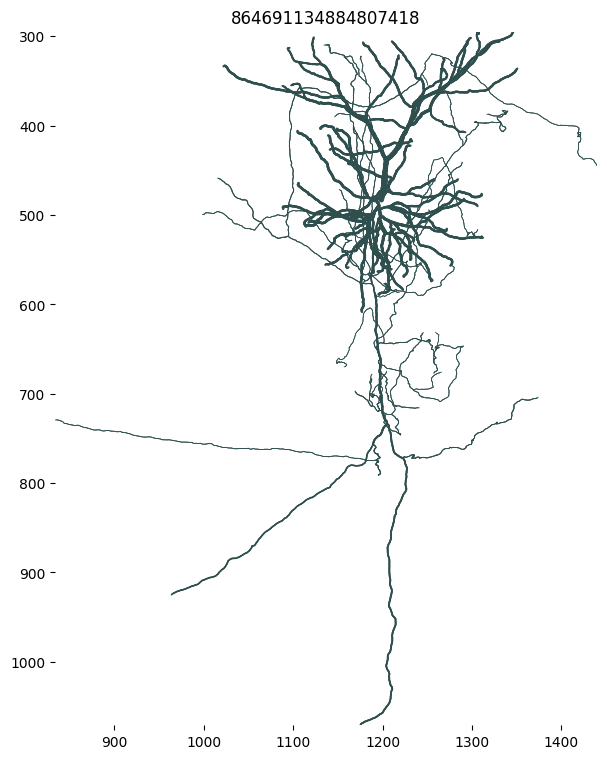

In [62]:
# plot the radii from the swc 
rid = 864691134884807418
sid = 518848
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')



f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, plot_soma = False,
                             line_width = 5, color = 'darkslategray')

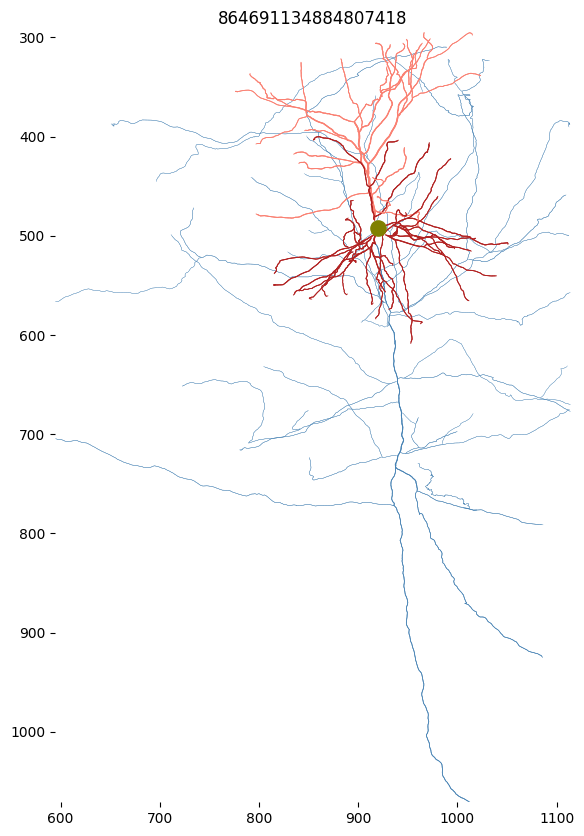

In [71]:
# invert y and x 
f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True, plot_compartment_colors = True,
                              invert_y=True, plot_soma = True, x = 'z', y = 'y',
                             line_width = 2, color = 'darkslategray')


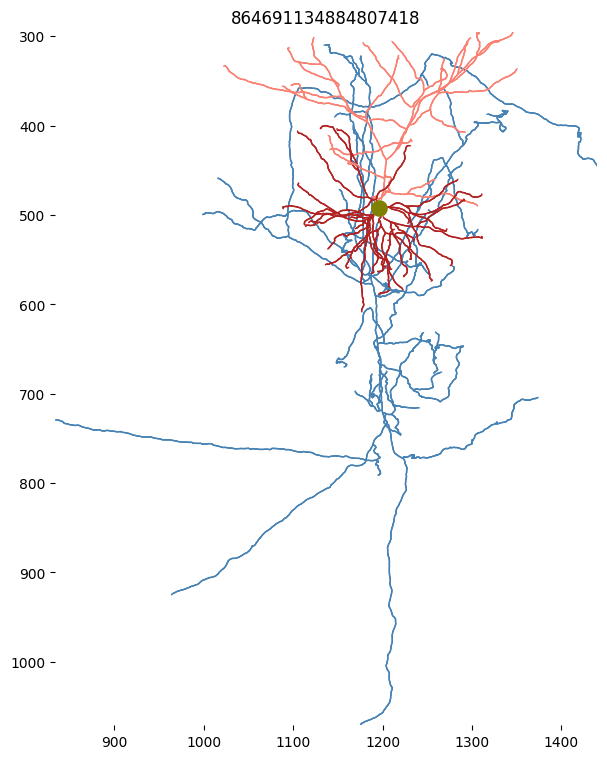

In [65]:
# plot with constant radius 
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_cell(ax, sk, title=rid, line_width=1, plot_soma=True, 
                                invert_y=True, plot_compartment_colors = True)



In [440]:
# check other swcs of mine, upright, layer aligned, etc 

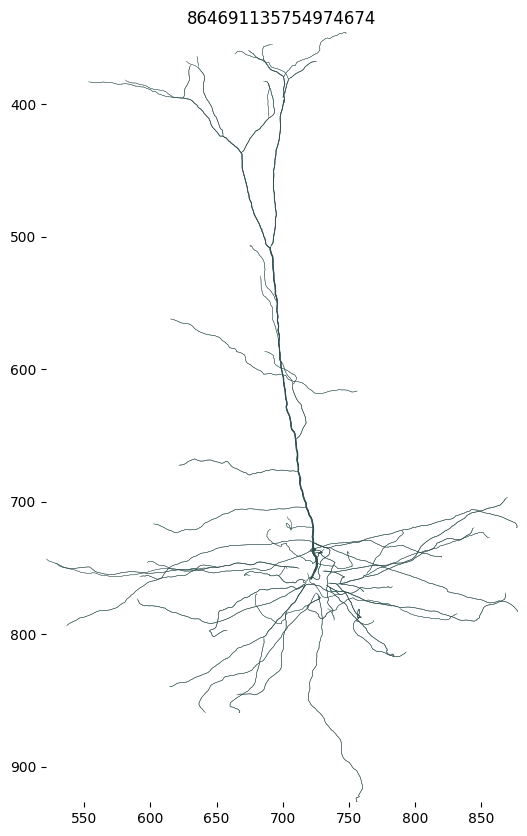

In [60]:
# plot some thicker skeletons with radius map 
rid = 864691135754974674
sid = 300897
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width=1)

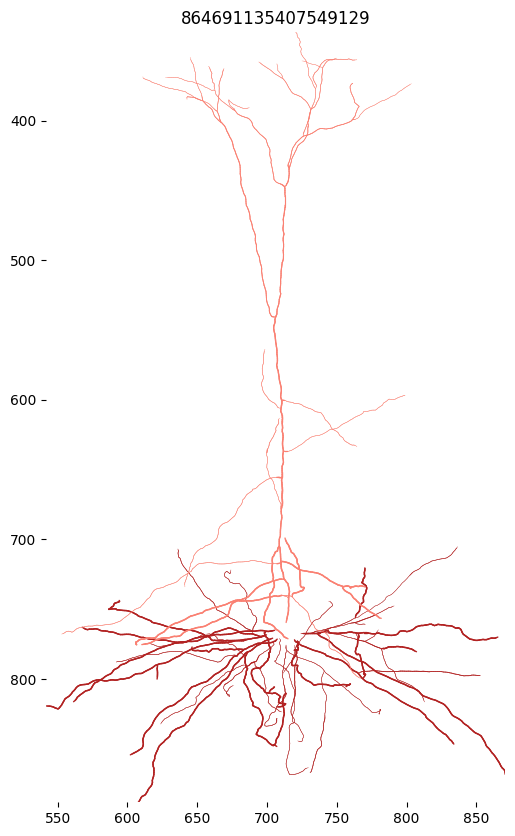

In [38]:
rid = 864691135407549129
sid = 265045
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True)




In [573]:
cover_paths_radius = skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 1)


[]
[]
[0.655 0.655 0.655 0.655 0.655 0.955 0.955 0.955 0.955 0.955 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.669
 0.669 0.669 0.669 0.669 0.669 0.669 0.669 0.

<Figure size 640x480 with 0 Axes>

In [577]:
[print(x) for x in question_df['radius'].values]

6.817
0.655
0.655
0.655
0.655
0.655
0.955
0.955
0.955
0.955
0.955
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.669
0.66

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [568]:
cover_paths_radius

[array([], dtype=float64), array([], dtype=float64)]

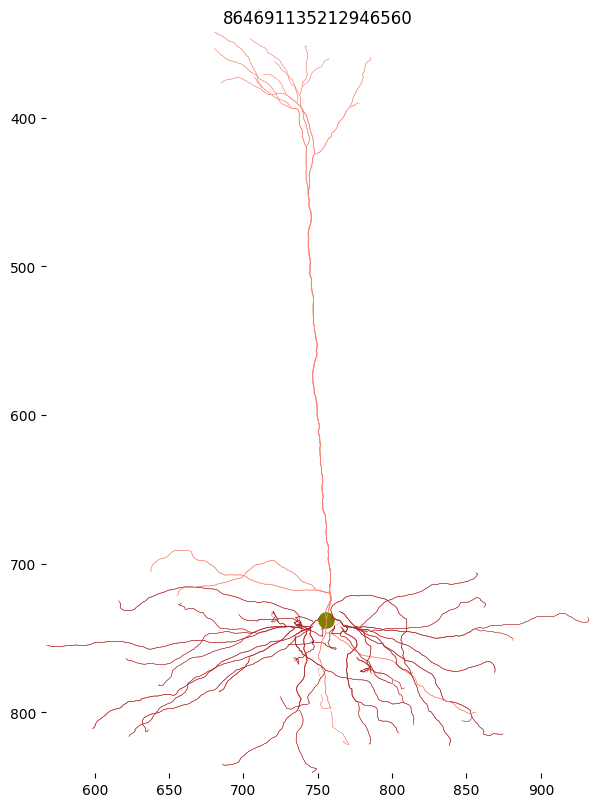

In [47]:
rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_cell(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 1, plot_soma = True,
                             plot_compartment_colors = True)

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'
df = skelplot.plot_tools.read_swc(swc_path)




In [835]:
cpr

array([0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277,
       0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277,
       0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277,
       0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277,
       0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.277, 0.225, 0.225,
       0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.127, 0.127, 0.127,
       0.127, 0.127, 0.127, 0.127, 0.127, 0.127, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126, 0.126,
       0.126, 0.126,

In [40]:
question_df = df[df['id'].isin(cover_path)]
import seaborn as sns
%matplotlib inline 
f , ax = plt.subplots(figsize=(7,10))
ax.invert_yaxis()
sns.scatterplot(question_df, x = 'x', y = 'y', size = question_df['radius']*5, ax = ax)



NameError: name 'cover_path' is not defined

In [546]:
question_df

,id,type,x,y,z,radius,parent
0,0,1,755.840,737.664,881.360,6.817,-1
1,1,4,757.408,730.578,879.278,0.655,0
2,2,4,757.721,729.161,878.862,0.655,1
3,3,4,758.035,727.744,878.446,0.655,2
4,4,4,758.348,726.326,878.029,0.655,3
...,...,...,...,...,...,...,...
301,301,4,683.455,344.160,913.044,0.297,300
302,302,4,682.350,343.607,912.178,0.297,301
303,303,4,681.622,342.930,911.083,0.297,302
304,304,4,681.206,342.531,909.687,0.297,303


In [806]:
[1]*(len(sk.cover_paths[0]-11))

SyntaxError: unexpected EOF while parsing (<ipython-input-806-eba601e0068b>, line 1)

NameError: name 'cpr' is not defined

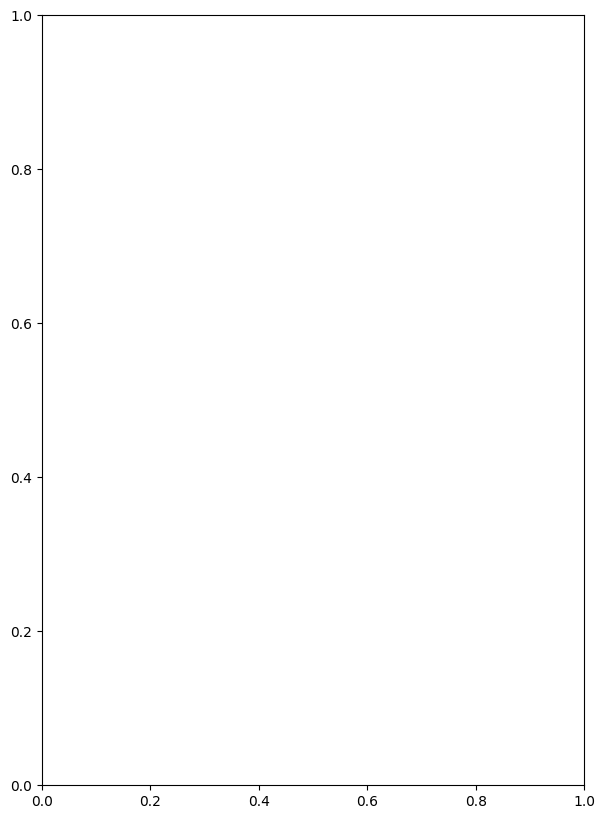

In [41]:
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_lc_verts(ax, sk, sk.cover_paths[0], 
                                 'red', radius_map = cpr)
ax.set_xlim(min(sk.vertices[:,0]), max(sk.vertices[:,0]))
ax.set_ylim(max(sk.vertices[:,1]), min(sk.vertices[:,1]))

In [ ]:
# test how line collection works - what are the three verts I give it?

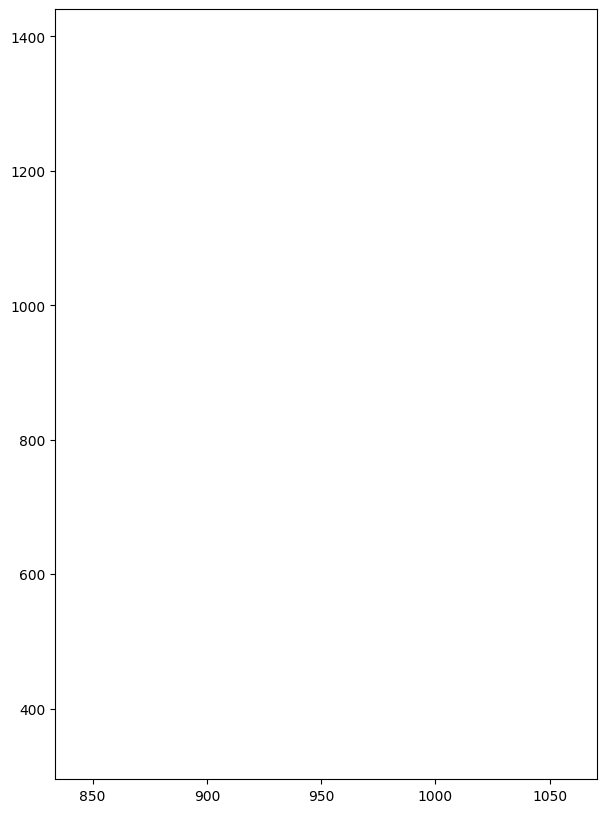

In [785]:
f , ax = plt.subplots(figsize=(7,10))
ax.set_xlim(min(sk.vertices[:,0]), max(sk.vertices[:,1]))
ax.set_ylim(min(sk.vertices[:,1]), max(sk.vertices[:,0]))
path_verts = sk.vertices[cp,0:2]
segments = np.concatenate([path_verts[:-2], path_verts[1:-1], path_verts[2:]], axis=1).reshape(len(path_verts)-2,3,2)

lc = LineCollection(segments, linewidths=cpr, color='red')
ax.add_collection(lc)

In [768]:
sk.vertices[:,0]

array([1196.268, 1197.324, 1197.588, ..., 1187.344, 1202.712, 1202.785])

In [762]:
sk.vertices[cp, :]

array([[1431.268,  436.853,  702.348],
       [1430.085,  436.76 ,  703.275],
       [1428.986,  436.76 ,  704.311],
       ...,
       [1197.588,  499.529,  917.253],
       [1197.324,  498.126,  917.747],
       [1196.268,  492.516,  919.72 ]])